# Determine Industry factors that are most important in Predicting Salary 

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sqrt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

- This data has already been scraped from the Seek website and saved in a csv file
- The data was scraped on 30.10.19
- This is accessed below:

In [2]:
seek = pd.read_csv('./data_analyst_scraping.csv', index_col=0)
seek = pd.DataFrame(seek)

## EDA and Clean

In [3]:
seek.isnull().sum()

Salary Range          3
Link                  3
Title                 3
Listing Date          3
Expiry Date           8
Job Title             3
Job Teaser            4
Advertiser            9
Area               1413
Work Type             9
Classification       15
Salary             3142
Salary Type          15
JD                   45
Location             15
Job Description      45
Strong Words         45
dtype: int64

In [4]:
seek.shape

(4755, 17)

In [5]:
seek.dtypes

Salary Range       object
Link               object
Title              object
Listing Date       object
Expiry Date        object
Job Title          object
Job Teaser         object
Advertiser         object
Area               object
Work Type          object
Classification     object
Salary             object
Salary Type        object
JD                 object
Location           object
Job Description    object
Strong Words       object
dtype: object

In [6]:
seek.columns

Index(['Salary Range', 'Link', 'Title', 'Listing Date', 'Expiry Date',
       'Job Title', 'Job Teaser', 'Advertiser', 'Area', 'Work Type',
       'Classification', 'Salary', 'Salary Type', 'JD', 'Location',
       'Job Description', 'Strong Words'],
      dtype='object')

In [7]:
cols = ['Salary_Range', 'Link', 'Title', 'Listing_Date', 'Expiry_Date',
       'Job_Title', 'Job_Teaser', 'Advertiser', 'Area', 'Work_Type',
       'Classification', 'Salary', 'Salary_Type', 'JD', 'Location',
       'Job_Description', 'Strong_Words']

In [8]:
seek.columns = cols

In [9]:
seek.head()

,Salary_Range,Link,Title,Listing_Date,Expiry_Date,Job_Title,Job_Teaser,Advertiser,Area,Work_Type,Classification,Salary,Salary_Type,JD,Location,Job_Description,Strong_Words
1,0-50000,https://www.seek.com.au/job/40264470,Data Analyst,2019-10-28T22:36:09.000Z,2019-11-28T12:59:59.000Z,Data Analyst,An opportunity to join an organisation as the ...,Davidson Technology,Western Suburbs,Full Time,Information & Communication Technology,NaN,AnnualPackage,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Melbourne,About the RoleThe Systems Data & Reporting Adm...,"['About the Role', 'About You', 'Sam Beeny', '..."
2,0-50000,https://www.seek.com.au/job/40228572,Data Analyst,2019-10-23T03:30:50.000Z,2019-11-22T12:59:59.000Z,Data Analyst,Data Analyst,Ally Fashion,"CBD, Inner West & Eastern Suburbs",Full Time,Accounting,NaN,AnnualPackage,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Sydney,We are seeking a Data Analyst to join our team...,['We are seeking a Data Analyst to join our te...
5,0-50000,https://www.seek.com.au/job/40198562,Reporting Analyst,2019-10-18T05:31:07.000Z,2019-11-17T12:59:59.000Z,Reporting Analyst,Play a key role in the analysis of large data ...,Talent – Winner ‘Seek Large Recruitment Agency...,CBD & Inner Suburbs,Contract/Temp,Information & Communication Technology,NaN,AnnualPackage,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Melbourne,Our client is a leader in the telecommunicatio...,[]
6,0-50000,https://www.seek.com.au/job/40251397,Data Analyst,2019-10-25T06:51:19.000Z,2019-11-24T12:59:59.000Z,Data Analyst,SAP experience is nice to have / baseline clea...,Modis,NaN,Contract/Temp,Information & Communication Technology,NaN,AnnualPackage,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",ACT,One of our premium government client based in ...,"['Canberra', 'Master Data Analyst.', 'Skills a..."
8,0-50000,https://www.seek.com.au/job/40260875,PI Data Analyst,2019-10-28T05:21:08.000Z,2019-11-27T12:59:59.000Z,PI Data Analyst,"In this role, you will be given the opportunit...",Titan Recruitment Pty Ltd,"CBD, Inner & Western Suburbs",Contract/Temp,Information & Communication Technology,NaN,AnnualPackage,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Perth,About the Role Work with a leading provider of...,"['About the Role', 'Key Criteria', ""What's on ..."


In [10]:
seek.tail()

,Salary_Range,Link,Title,Listing_Date,Expiry_Date,Job_Title,Job_Teaser,Advertiser,Area,Work_Type,Classification,Salary,Salary_Type,JD,Location,Job_Description,Strong_Words
977,150000-999999,https://www.seek.com.au/job/40184613,Business Analyst,2019-10-17T00:40:24.000Z,2019-11-16T12:59:59.000Z,Business Analyst,Our national blue-chip client is in the proces...,Peoplebank Australia SA,NaN,Contract/Temp,Information & Communication Technology,NaN,HourlyRate,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Adelaide,Microsoft Dynamics 365 Implementation with Aus...,"['You will be responsible for:', 'To be consid..."
978,150000-999999,https://www.seek.com.au/job/40204902,Senior Business Analyst - Insurance,2019-10-20T23:10:48.000Z,2019-11-20T12:59:59.000Z,Senior Business Analyst - Insurance,A well known Insurance organisation is seeking...,Robert Walters,NaN,Contract/Temp,Information & Communication Technology,$750 - $850 p.d. + Inclusive of super,HourlyRate,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Sydney,Roles:The role is situated within the Business...,"['Roles:', '', 'Benefits:', 'Role and Responsi..."
979,150000-999999,https://www.seek.com.au/job/40154073,EDRMS Business Analyst,2019-10-14T00:42:27.000Z,2019-11-13T12:59:59.000Z,EDRMS Business Analyst,7 month contract opportunity - EDRMS Business...,Finite IT Recruitment Solutions,CBD & Inner Suburbs,Contract/Temp,Information & Communication Technology,NaN,HourlyRate,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Brisbane,A new 7 month contract opportunity is current...,"['Further to this, the EDRMS Business Analyst ..."
980,150000-999999,https://www.seek.com.au/job/40059471,SQL Developer,2019-09-30T08:56:07.000Z,2019-10-30T12:59:59.000Z,SQL Developer,SSIS - SSRS - SSAS - Power BI - ETL - Warehous...,Hays Information Technology,NaN,Contract/Temp,Information & Communication Technology,NaN,HourlyRate,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",ACT,SSIS - SSRS - SSAS - Power BI - ETL - Warehous...,"['Your new company', 'Your new role', ""What yo..."
981,150000-999999,https://www.seek.com.au/job/40091945,"Group Leader, ProCan Data Technology",2019-10-03T23:20:11.000Z,2019-11-02T23:20:11.000Z,"Group Leader, ProCan Data Technology",We're looking for a senior professional to lea...,Children's Medical Research Institute,Parramatta & Western Suburbs,Full Time,Science & Technology,NaN,AnnualPackage,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Sydney,Children’s Medical Research Institute (CMRI) w...,"['Group Leader, \xa0ProCan', '®', 'Data Techno..."


In [11]:
seek.describe()

,Salary_Range,Link,Title,Listing_Date,Expiry_Date,Job_Title,Job_Teaser,Advertiser,Area,Work_Type,Classification,Salary,Salary_Type,JD,Location,Job_Description,Strong_Words
count,4752,4752,4752,4752,4747,4752,4751,4746,3342,4746,4740,1613,4740,4710,4740,4710,4710
unique,13,4749,3079,4580,1344,3143,4208,1851,26,9,30,1188,3,4320,56,4311,3333
top,150000-999999,Northern Suburbs,Business Analyst,2019-10-28T22:45:54.000Z,2019-11-24T12:59:59.000Z,Business Analyst,Are you open to a career change that will make...,Private Advertiser,CBD & Inner Suburbs,Full Time,Information & Communication Technology,Competitive,AnnualPackage,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Sydney,This award-winning Solution Provider based in ...,[]
freq,981,2,235,6,264,207,13,80,1160,3067,2109,32,3597,7,1832,7,558


- It appears that there is an incorrect entry for Listing Date, this can be removed
- Below is a filter to show all the entries with that Listing Date value
- On examination following that, there is another incorrect value Consulting & Strategy in the date column. This is also removed

In [12]:
seek.Listing_Date.value_counts()

2019-10-28T22:45:54.000Z                  6
Information & Communication Technology    5
2019-10-15T04:31:02.000Z                  4
2019-10-02T06:16:06.000Z                  4
2019-10-17T18:31:03.000Z                  4
                                         ..
2019-10-04T05:18:17.000Z                  1
2019-10-22T03:31:03.000Z                  1
2019-10-24T04:22:38.000Z                  1
2019-10-21T09:05:24.000Z                  1
2019-10-17T23:30:48.000Z                  1
Name: Listing_Date, Length: 4580, dtype: int64

In [13]:
l1 = ['Information & Communication Technology','Consulting & Strategy']

In [14]:
seek[seek.Listing_Date.isin(l1)]

,Salary_Range,Link,Title,Listing_Date,Expiry_Date,Job_Title,Job_Teaser,Advertiser,Area,Work_Type,Classification,Salary,Salary_Type,JD,Location,Job_Description,Strong_Words
• Excellent verbal and writte,FinXL IT Professional Services,"CBD, Inner West & Eastern Suburbs",Full Time,Information & Communication Technology,NaN,AnnualPackage,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Sydney,FinXL is looking for a Senior Business Analyst...,"[""What we're looking for"", 'Skills/ Expertise:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
We are working with a well-known financial services business in Sydney who are seeking a Lean Data Analytics Manager to join on a contract basis,Finite Banking & Finance,"CBD, Inner West & Eastern Suburbs",Contract/Temp,Consulting & Strategy,NaN,HourlyRate,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Sydney,We are working with a well-known financial s...,"['Accountabilities of the role', 'Required ski...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
· Discovery/confirmation of application topolog,FinXL IT Professional Services,Northern Suburbs,Contract/Temp,Information & Communication Technology,80-90/hr,HourlyRate,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Brisbane,FinXL IT Professional Services is an establi...,['The Role-Application Consultant/Technical BA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Experience with,FinXL IT Professional Services,CBD & Inner Suburbs,Contract/Temp,Information & Communication Technology,NaN,HourlyRate,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Brisbane,The Company FinXL IT Professional Services...,"['The Company', 'FinXL IT Professional Service...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
· Discovery/confirmation of application topology,FinXL IT Professional Services,Northern Suburbs,Contract/Temp,Information & Communication Technology,NaN,HourlyRate,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Brisbane,FinXL IT Professional Services is an establi...,['The Role-Application Consultant/Technical BA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
· Discovery/confirmation of application topology,FinXL IT Professional Services,CBD & Inner Suburbs,Contract/Temp,Information & Communication Technology,NaN,HourlyRate,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Brisbane,FinXL IT Professional Services is an establi...,"['The Role-Application Consultant- SQL, Window...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
seek = seek[seek.Listing_Date != 'Information & Communication Technology']
seek = seek[seek.Listing_Date != 'Consulting & Strategy']

In [16]:
seek.Listing_Date.value_counts(sort=True, ascending=False)

2019-10-28T22:45:54.000Z    6
2019-10-28T03:32:54.000Z    4
2019-10-17T18:31:03.000Z    4
2019-10-21T01:39:09.000Z    4
2019-10-21T22:13:54.000Z    4
                           ..
2019-10-16T05:36:05.000Z    1
2019-10-04T05:18:17.000Z    1
2019-10-22T03:31:03.000Z    1
2019-10-24T04:22:38.000Z    1
2019-10-17T23:30:48.000Z    1
Name: Listing_Date, Length: 4578, dtype: int64

- This is converted to date time so that it is correctly formated

In [17]:
seek['Listing_Date'] = pd.to_datetime(seek.Listing_Date)

- There are many empty columns for salary
- Therefore I will use the Salary Range column
- Duplicates have already been removed in the scraping process
- I will also drop the Expiry Date column as it does not carry any useful information for this model

In [18]:
seek.Salary.isnull().sum()

3136

In [19]:
seek = seek.drop(['Salary', 'Expiry_Date'], axis=1)

In [20]:
seek.head()

,Salary_Range,Link,Title,Listing_Date,Job_Title,Job_Teaser,Advertiser,Area,Work_Type,Classification,Salary_Type,JD,Location,Job_Description,Strong_Words
1,0-50000,https://www.seek.com.au/job/40264470,Data Analyst,2019-10-28 22:36:09+00:00,Data Analyst,An opportunity to join an organisation as the ...,Davidson Technology,Western Suburbs,Full Time,Information & Communication Technology,AnnualPackage,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Melbourne,About the RoleThe Systems Data & Reporting Adm...,"['About the Role', 'About You', 'Sam Beeny', '..."
2,0-50000,https://www.seek.com.au/job/40228572,Data Analyst,2019-10-23 03:30:50+00:00,Data Analyst,Data Analyst,Ally Fashion,"CBD, Inner West & Eastern Suburbs",Full Time,Accounting,AnnualPackage,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Sydney,We are seeking a Data Analyst to join our team...,['We are seeking a Data Analyst to join our te...
5,0-50000,https://www.seek.com.au/job/40198562,Reporting Analyst,2019-10-18 05:31:07+00:00,Reporting Analyst,Play a key role in the analysis of large data ...,Talent – Winner ‘Seek Large Recruitment Agency...,CBD & Inner Suburbs,Contract/Temp,Information & Communication Technology,AnnualPackage,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Melbourne,Our client is a leader in the telecommunicatio...,[]
6,0-50000,https://www.seek.com.au/job/40251397,Data Analyst,2019-10-25 06:51:19+00:00,Data Analyst,SAP experience is nice to have / baseline clea...,Modis,NaN,Contract/Temp,Information & Communication Technology,AnnualPackage,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",ACT,One of our premium government client based in ...,"['Canberra', 'Master Data Analyst.', 'Skills a..."
8,0-50000,https://www.seek.com.au/job/40260875,PI Data Analyst,2019-10-28 05:21:08+00:00,PI Data Analyst,"In this role, you will be given the opportunit...",Titan Recruitment Pty Ltd,"CBD, Inner & Western Suburbs",Contract/Temp,Information & Communication Technology,AnnualPackage,"<div class=""_2e4Pi2B"" data-automation=""mobileT...",Perth,About the Role Work with a leading provider of...,"['About the Role', 'Key Criteria', ""What's on ..."


In [21]:
seek.Salary_Range.value_counts(sort=True)

150000-999999    981
60000-70000      601
140000-150000    593
70000-80000      592
50000-60000      572
0-50000          549
110000-120000    453
90000-100000     398
80000-90000        3
100000-110000      2
120000-130000      2
Name: Salary_Range, dtype: int64

In [22]:
seek.Salary_Range.value_counts().sum()

4746

In [23]:
seek.Salary_Range.isnull().sum()

3

- The salary range column should be numeric so that it can be input into a model, I will map the midpoint of each salary range to the current ranges
- For the lower and uppper ranges, I will make the value just above or below the range

In [24]:
salary_range_map = {'0-50000': 40000, '50000-60000': 55000, '60000-70000': 65000, '70000-80000':75000, '80000-90000': 85000,
'90000-100000': 95000, '100000-110000': 105000, '110000-120000': 115000, '120000-130000': 125000, '130000-140000':135000,
 '140000-150000': 145000, '150000-999999': 160000}

seek['Salary_Range'] = seek.Salary_Range.map(salary_range_map)

In [25]:
seek.Salary_Range.value_counts()

160000.0    981
65000.0     601
145000.0    593
75000.0     592
55000.0     572
40000.0     549
115000.0    453
95000.0     398
85000.0       3
105000.0      2
125000.0      2
Name: Salary_Range, dtype: int64

- Below I can see all the columns which have null values
- The Area Column has many null values, this is because it is an optional column and a subset of the Location Column
- First, I will drop this column
- Then I will drop all rows which have null values as there are not many other null values in comparison to the size of the dataset

In [26]:
seek.isnull().sum()

Salary_Range          3
Link                  3
Title                 3
Listing_Date          3
Job_Title             3
Job_Teaser            4
Advertiser            9
Area               1413
Work_Type             9
Classification        9
Salary_Type           9
JD                   39
Location              9
Job_Description      39
Strong_Words         39
dtype: int64

In [27]:
seek = seek.drop(['Area'], axis=1)

In [28]:
seek.isnull().sum()

Salary_Range        3
Link                3
Title               3
Listing_Date        3
Job_Title           3
Job_Teaser          4
Advertiser          9
Work_Type           9
Classification      9
Salary_Type         9
JD                 39
Location            9
Job_Description    39
Strong_Words       39
dtype: int64

In [29]:
new_data = seek.dropna(axis = 0, how ='any') 

In [30]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4710 entries, 1 to 981
Data columns (total 14 columns):
Salary_Range       4710 non-null float64
Link               4710 non-null object
Title              4710 non-null object
Listing_Date       4710 non-null datetime64[ns, UTC]
Job_Title          4710 non-null object
Job_Teaser         4710 non-null object
Advertiser         4710 non-null object
Work_Type          4710 non-null object
Classification     4710 non-null object
Salary_Type        4710 non-null object
JD                 4710 non-null object
Location           4710 non-null object
Job_Description    4710 non-null object
Strong_Words       4710 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), object(12)
memory usage: 552.0+ KB


- The data type is a pandas series, I will convert to DataFrame so I can manipulate it

In [31]:
type(seek.Salary_Range)

pandas.core.series.Series

In [32]:
new_data1 = pd.DataFrame(new_data) 

In [33]:
new_data1.shape

(4710, 14)

In [34]:
type(new_data1)

pandas.core.frame.DataFrame

- Next I will visualise the Salary Range, which will be the target for my model
- The median is the green line on the graph
- The mean is the red line
- It appears to have a binomial distribution

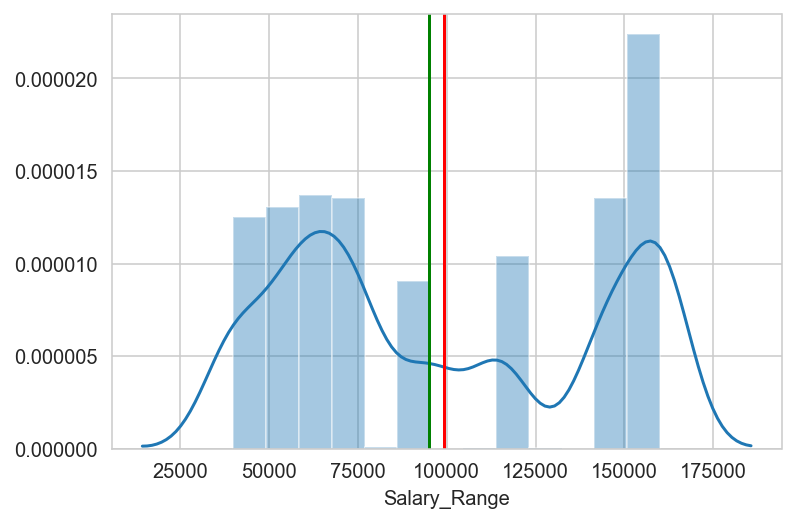

In [35]:
median = new_data1.Salary_Range.median()
mean = new_data1.Salary_Range.mean()
sns.distplot(new_data1.Salary_Range)
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mean, color='r', linestyle='-')
plt.show()

In [36]:
print('The median is $', round(median))
print('The mean is $', round(mean))

The median is $ 95000
The mean is $ 99133


- I will drop columns which do not have useful information for my model
- Next I will inspect the Job Title column
- There are 3055 different Job Titles, this needs to be refined to make it model - friendly
- I will make a copy of current data to save where I have got to so far
- I will condense the job titles into several unique categories
- First, I will remove any job title without 'Analyst', 'Scientist', 'Engineer' or 'Data' in it
- This can be done using the boolean mask below
- Then I will iterate through the remaining job titles, if the job meets a criteria, it will be added to a list of similar jobs
- Then I will classify each of the job titles according to these lists
- A new column is make called Clean_Job_Title which will be used for the model

In [37]:
df = new_data1.copy()

In [38]:
df = df[['Salary_Range','Title','Location', 'Work_Type', 'Job_Description','Classification']]

In [39]:
df.Title.value_counts()

Business Analyst                         232
Data Analyst                             115
Senior Business Analyst                   51
Technical Business Analyst                48
Data Engineer                             47
                                        ... 
Analytics Lead (Change Management)         1
Clinical Trials Proposals Analyst          1
Team Leader Corporate Services             1
Process Engineer                           1
Power BI/Application Support posiiton      1
Name: Title, Length: 3055, dtype: int64

In [40]:
searchfor = ['Analyst', 'Scientist', 'Engineer', 'Data']
df = df[df.Title.str.contains('|'.join(searchfor))]

In [41]:
# any job title that contains 'Analyst' or 'Analytics' will be classified as 'Data Analyst'
analyst_jobs = []
for title in df.Title:
    if 'Analyst' in title:
        analyst_jobs.append(title)
    elif 'Analytics' in title:
        analyst_jobs.append(title)

# any job title that contains 'Scientist' or 'Science' will be classified as 'Data Scientist' 
scientist_jobs = []
for title in df.Title:
    if 'Scientist' in title:
        scientist_jobs.append(title)
    elif 'Science' in title:
        scientist_jobs.append(title)



In [42]:
#classify each of the job titles according to these lists
clean_jobs = []
for job in list(df['Title']):             
        if job in scientist_jobs:
            clean_jobs.append('Data Scientist')    
        elif job in analyst_jobs:
            clean_jobs.append('Data Analyst')
        else:
            clean_jobs.append('Unknown')

df['Clean_Job_Title'] = clean_jobs

- I can visualise the new columns below:
    - There are some unknown values which did not match any of the criteria
    - These will be dropped so that we later can predict Data Analyst vs Data Scientist roles looking at just the job description

In [43]:
df.Clean_Job_Title.value_counts()

Data Analyst      2401
Unknown            584
Data Scientist     130
Name: Clean_Job_Title, dtype: int64

In [44]:
df.Clean_Job_Title.value_counts().sum()

3115

In [45]:
df = df[df.Clean_Job_Title != 'Unknown']

In [46]:
df.Clean_Job_Title.value_counts()

Data Analyst      2401
Data Scientist     130
Name: Clean_Job_Title, dtype: int64

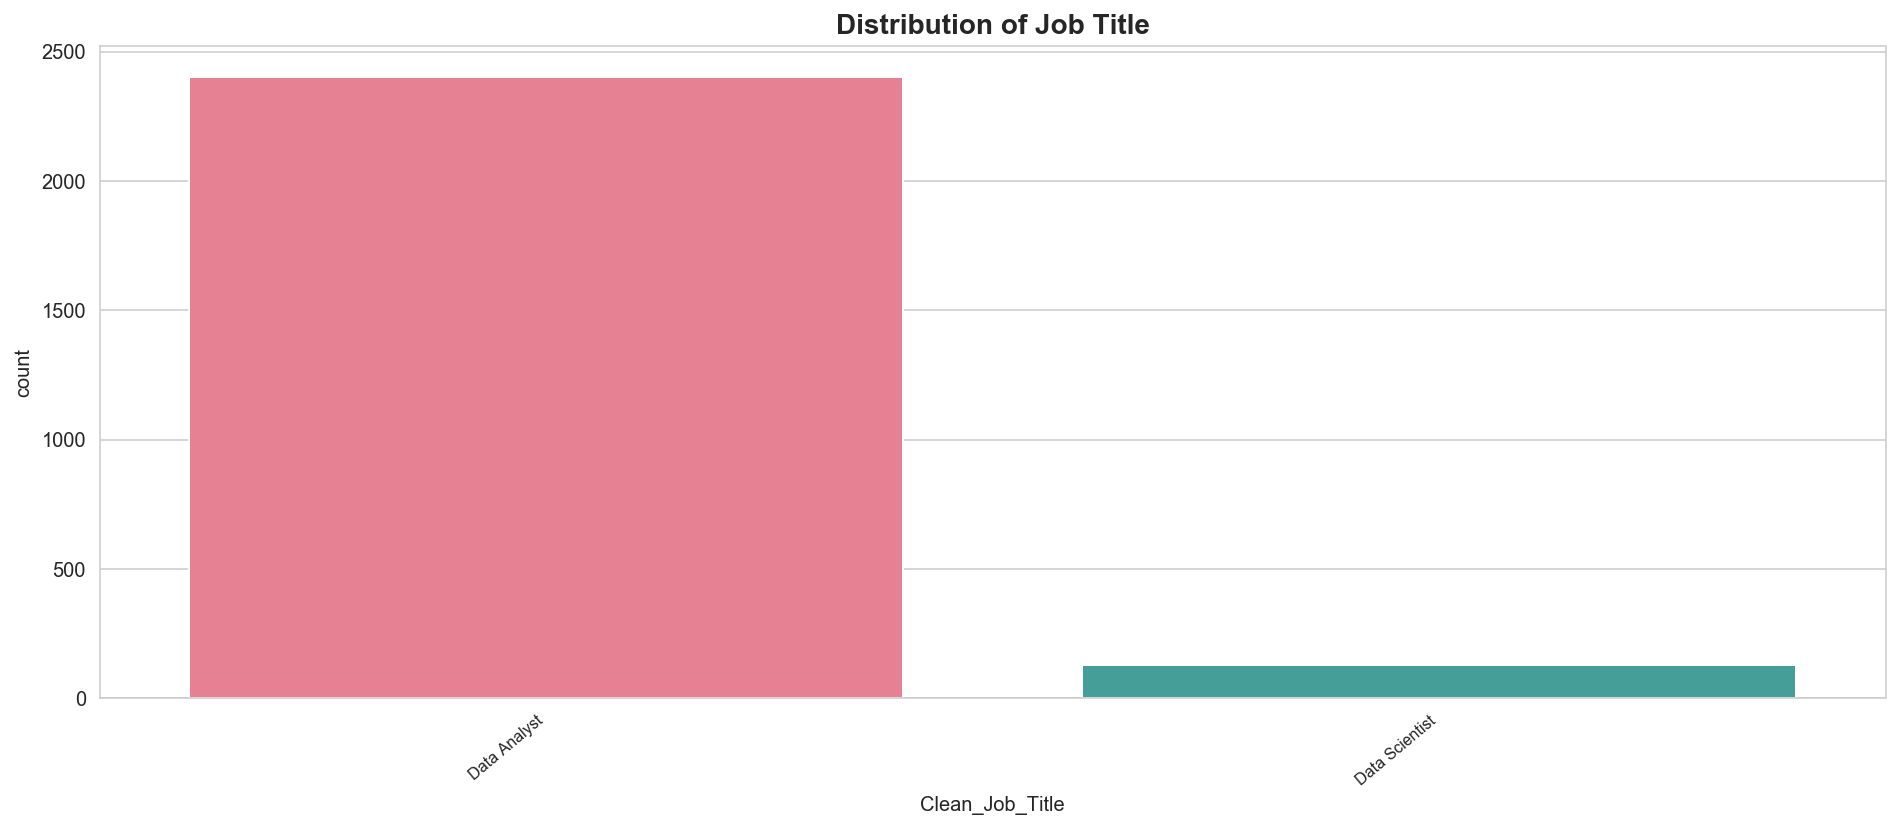

In [47]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x='Clean_Job_Title', data=df, palette='husl')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of Job Title', fontsize=14, fontweight='bold')
plt.show()

- I can see that Data Analyst has many more values than the other Job Titles, with over 2000 values
- Data Scientist has only 130 values

In [48]:
df.columns

Index(['Salary_Range', 'Title', 'Location', 'Work_Type', 'Job_Description',
       'Classification', 'Clean_Job_Title'],
      dtype='object')

In [49]:
df.head()

,Salary_Range,Title,Location,Work_Type,Job_Description,Classification,Clean_Job_Title
1,40000.0,Data Analyst,Melbourne,Full Time,About the RoleThe Systems Data & Reporting Adm...,Information & Communication Technology,Data Analyst
2,40000.0,Data Analyst,Sydney,Full Time,We are seeking a Data Analyst to join our team...,Accounting,Data Analyst
5,40000.0,Reporting Analyst,Melbourne,Contract/Temp,Our client is a leader in the telecommunicatio...,Information & Communication Technology,Data Analyst
6,40000.0,Data Analyst,ACT,Contract/Temp,One of our premium government client based in ...,Information & Communication Technology,Data Analyst
8,40000.0,PI Data Analyst,Perth,Contract/Temp,About the Role Work with a leading provider of...,Information & Communication Technology,Data Analyst


In [50]:
#drop the Title column as this has been replaced by Clean_Job_Title
df.drop('Title', axis=1, inplace=True)

 - Let's check the salary distribution after those changes to see if it had an effect
 - The mean and median have increased, indicating that lower salary jobs were removed
 - The distribution is still binomial


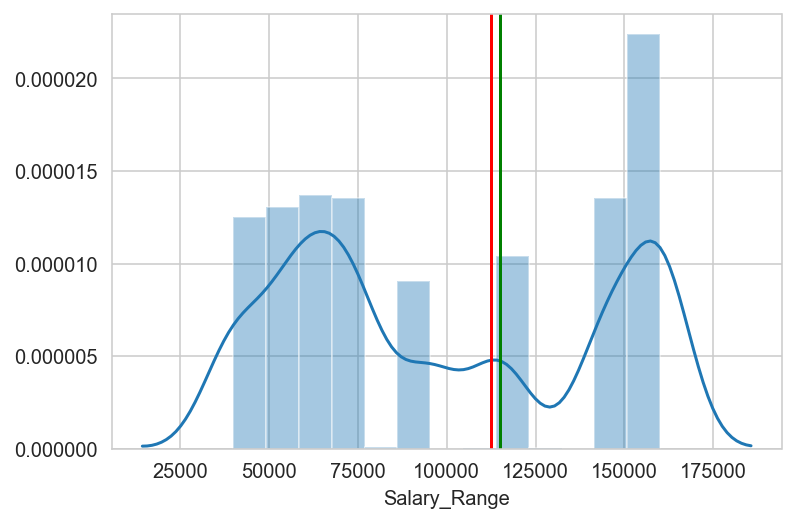

In [51]:
median = df.Salary_Range.median()
mean = df.Salary_Range.mean()
sns.distplot(new_data1.Salary_Range)
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mean, color='r', linestyle='-')
plt.show()

In [52]:
print('The median is $', round(median))
print('The mean is $', round(mean))

The median is $ 115000
The mean is $ 112343


In [53]:
df.head()

,Salary_Range,Location,Work_Type,Job_Description,Classification,Clean_Job_Title
1,40000.0,Melbourne,Full Time,About the RoleThe Systems Data & Reporting Adm...,Information & Communication Technology,Data Analyst
2,40000.0,Sydney,Full Time,We are seeking a Data Analyst to join our team...,Accounting,Data Analyst
5,40000.0,Melbourne,Contract/Temp,Our client is a leader in the telecommunicatio...,Information & Communication Technology,Data Analyst
6,40000.0,ACT,Contract/Temp,One of our premium government client based in ...,Information & Communication Technology,Data Analyst
8,40000.0,Perth,Contract/Temp,About the Role Work with a leading provider of...,Information & Communication Technology,Data Analyst


In [54]:
df.Location.value_counts()

Sydney                                  1118
Melbourne                                692
Brisbane                                 263
ACT                                      164
Perth                                    118
Adelaide                                  71
Newcastle, Maitland & Hunter              16
Gosford & Central Coast                    9
South West Coast VIC                       9
Darwin                                     8
Wollongong, Illawarra & South Coast        7
Gold Coast                                 7
Northern QLD                               6
Sunshine Coast                             5
Hobart                                     3
Cairns & Far North                         3
Port Macquarie & Mid North Coast           3
Kalgoorlie, Goldfields & Esperance         3
Mackay & Coalfields                        2
Asia Pacific                               2
Coffs Harbour & North Coast                2
Launceston & North East                    2
Wagga Wagg

**EDA of Location**

- Let's refine to compare the main cities with value counts over 50
- Since ACT is interchangeable with Canberra, we will keep ACT

In [55]:
def location_rollup(loc_string):
    if loc_string in ['Sydney','Melbourne','Brisbane','ACT','Perth','Adelaide']:
        return loc_string
    else:
        return "other"

In [56]:
df['location_rolled'] = df['Location'].apply(location_rollup)

In [57]:
df['location_rolled']

1      Melbourne
2         Sydney
5      Melbourne
6            ACT
8          Perth
         ...    
972          ACT
975       Sydney
977     Adelaide
978       Sydney
979     Brisbane
Name: location_rolled, Length: 2531, dtype: object

In [58]:
df.location_rolled.value_counts()

Sydney       1118
Melbourne     692
Brisbane      263
ACT           164
Perth         118
other         105
Adelaide       71
Name: location_rolled, dtype: int64

- Below shows the value counts of the Locations
- Sydney has the most jobs advertised by far, followed by Melbourne
- Adelaide has the least amount of jobs advertised

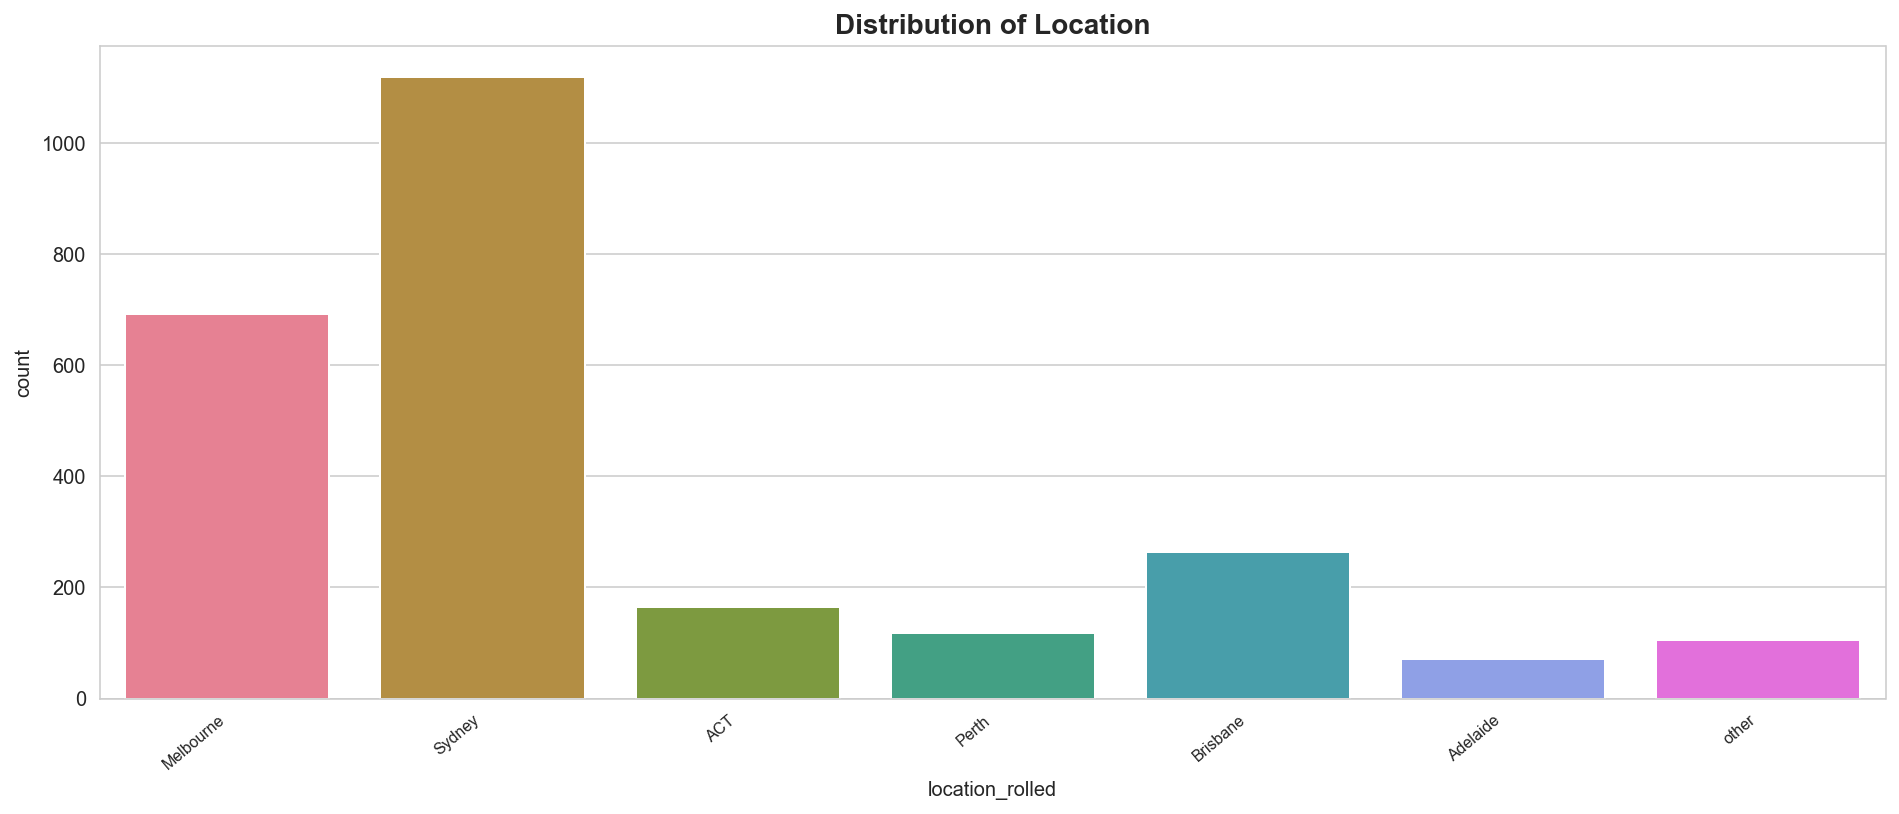

In [59]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x='location_rolled', data=df, palette='husl')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of Location', fontsize=14, fontweight='bold')
plt.show()

- The median salary appears to be highest in ACT
- All other major cities except Adelaide have the same median salaries

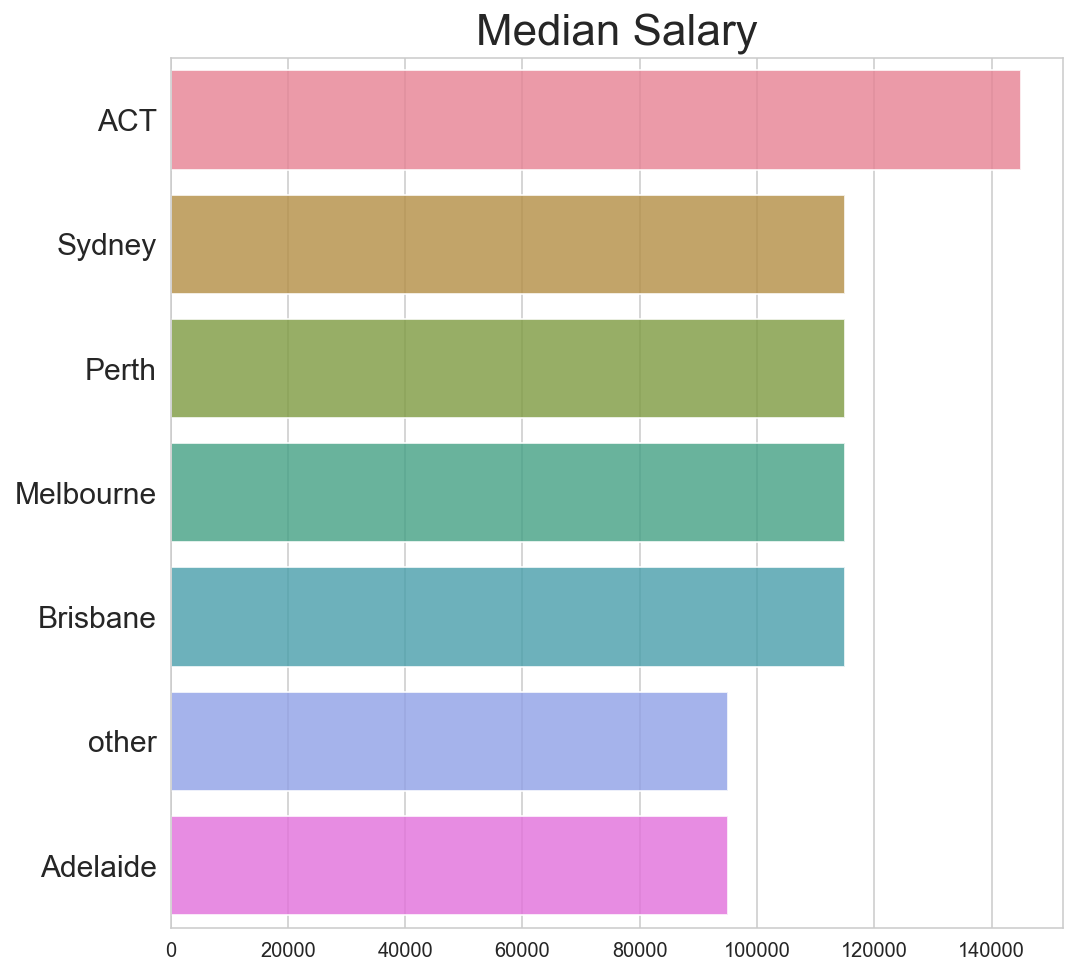

In [60]:
location_salary = df.groupby('location_rolled')['Salary_Range'].median().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
sns.barplot(y=location_salary.index, x=location_salary.values, alpha=0.8, palette='husl')
plt.title("Median Salary", fontsize=22)
plt.ylabel('', fontsize=20)
plt.xlabel('', fontsize=20)
plt.yticks(fontsize=15)
plt.show()

**EDA of Job Industry**

In [61]:
df.Classification.value_counts()

Information & Communication Technology    1306
Banking & Financial Services               261
Accounting                                 252
Government & Defence                       140
Consulting & Strategy                      116
Science & Technology                        64
Marketing & Communications                  60
Insurance & Superannuation                  48
Sales                                       41
Manufacturing, Transport & Logistics        38
Real Estate & Property                      34
Mining, Resources & Energy                  32
Human Resources & Recruitment               32
Engineering                                 20
Education & Training                        20
Retail & Consumer Products                  19
Healthcare & Medical                        12
Hospitality & Tourism                        7
Community Services & Development             6
Administration & Office Support              5
Call Centre & Customer Service               5
Legal        

In [62]:
def class_rollup(class_string):
    if class_string in ['Information & Communication Technology','Banking & Financial Services','Accounting',
                       'Government & Defence','Consulting & Strategy','Science & Technology ',
                       'Marketing & Communications', 'Insurance & Superannuation', 'Sales',
                       'Manufacturing, Transport & Logistics', 'Real Estate & Property', 'Mining, Resources & Energy',
                       'Human Resources & Recruitment', 'Engineering', 'Education & Training']:
        return class_string
    else:
        return 'other'   

In [63]:
df['class_rollup'] = df['Classification'].apply(class_rollup)

In [64]:
df.class_rollup.value_counts()

Information & Communication Technology    1306
Banking & Financial Services               261
Accounting                                 252
Government & Defence                       140
other                                      131
Consulting & Strategy                      116
Marketing & Communications                  60
Insurance & Superannuation                  48
Sales                                       41
Manufacturing, Transport & Logistics        38
Real Estate & Property                      34
Human Resources & Recruitment               32
Mining, Resources & Energy                  32
Engineering                                 20
Education & Training                        20
Name: class_rollup, dtype: int64

- Looking at the value counts for Classification, Information & Communication Technology leads significantly
- This is followed by other industries which much lower value counts

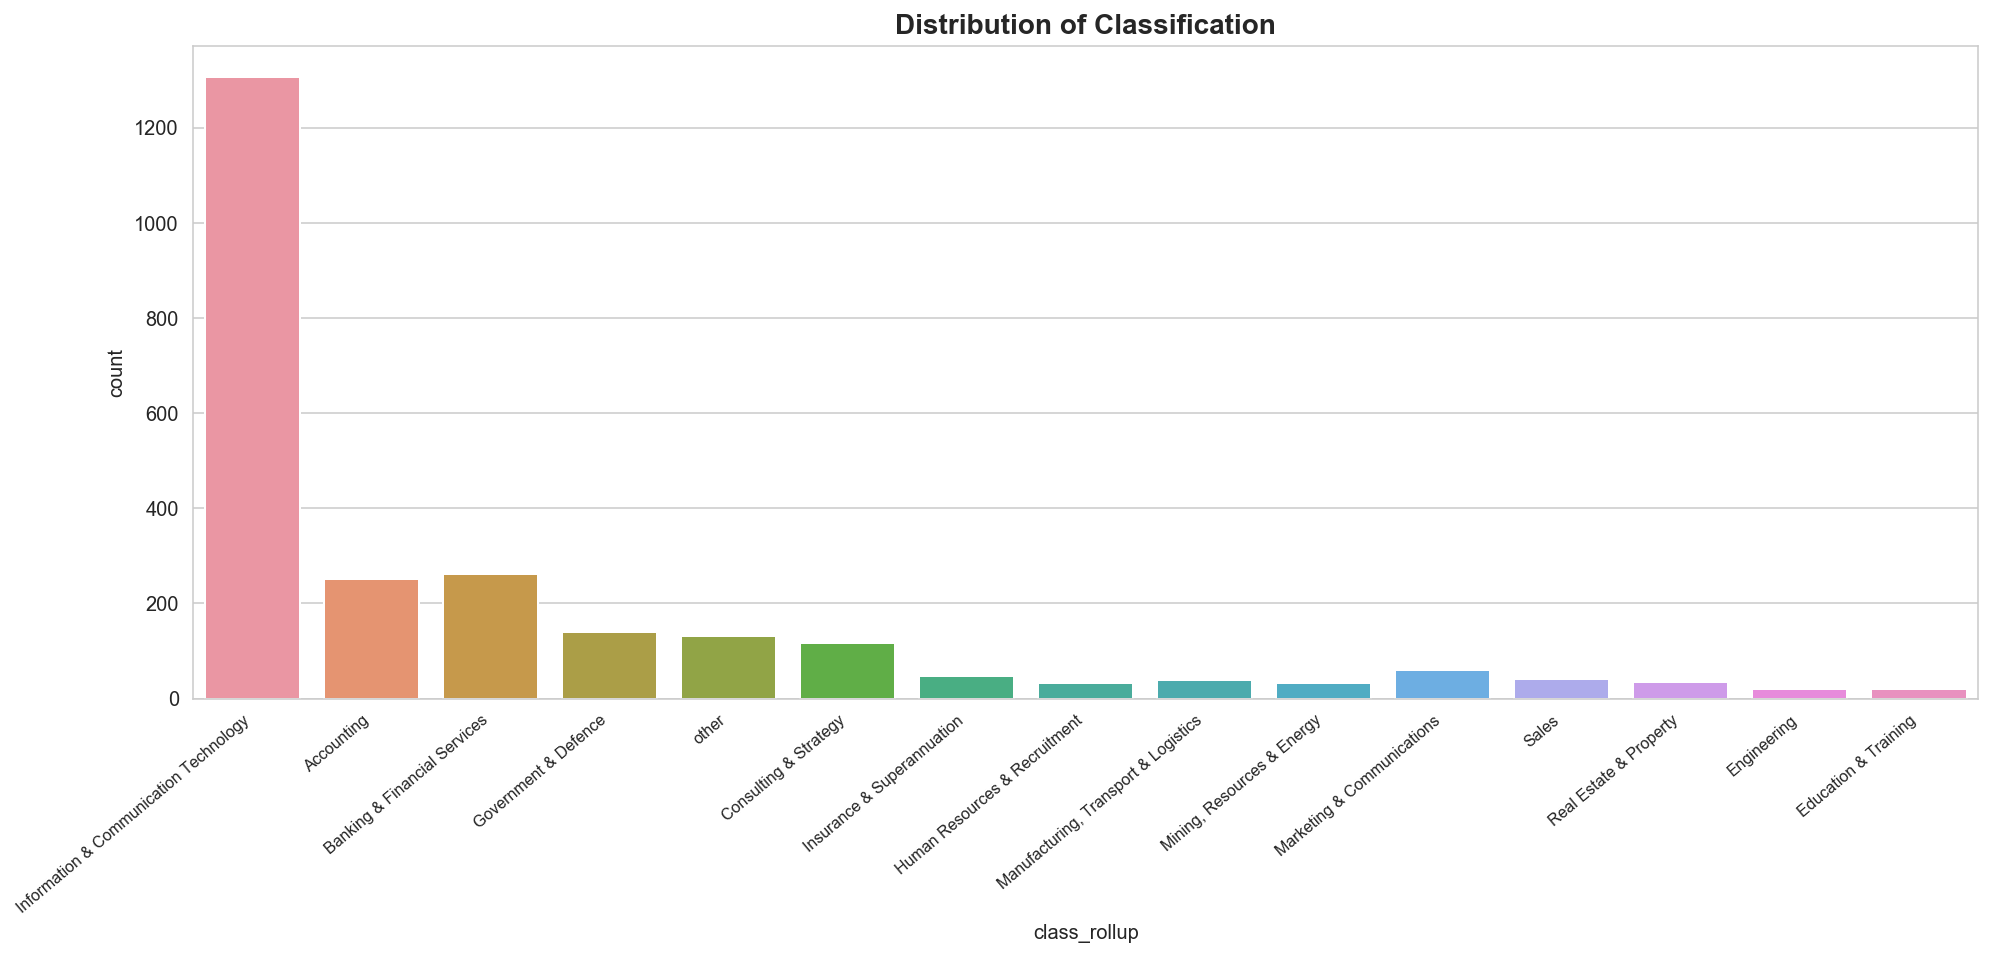

In [65]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x='class_rollup', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of Classification', fontsize=14, fontweight='bold')
plt.show()

- Information & Communication Technology leads in the median salary followed by Mining, Resources & Energy and Education and Training
- Engineering has the lowest median salary

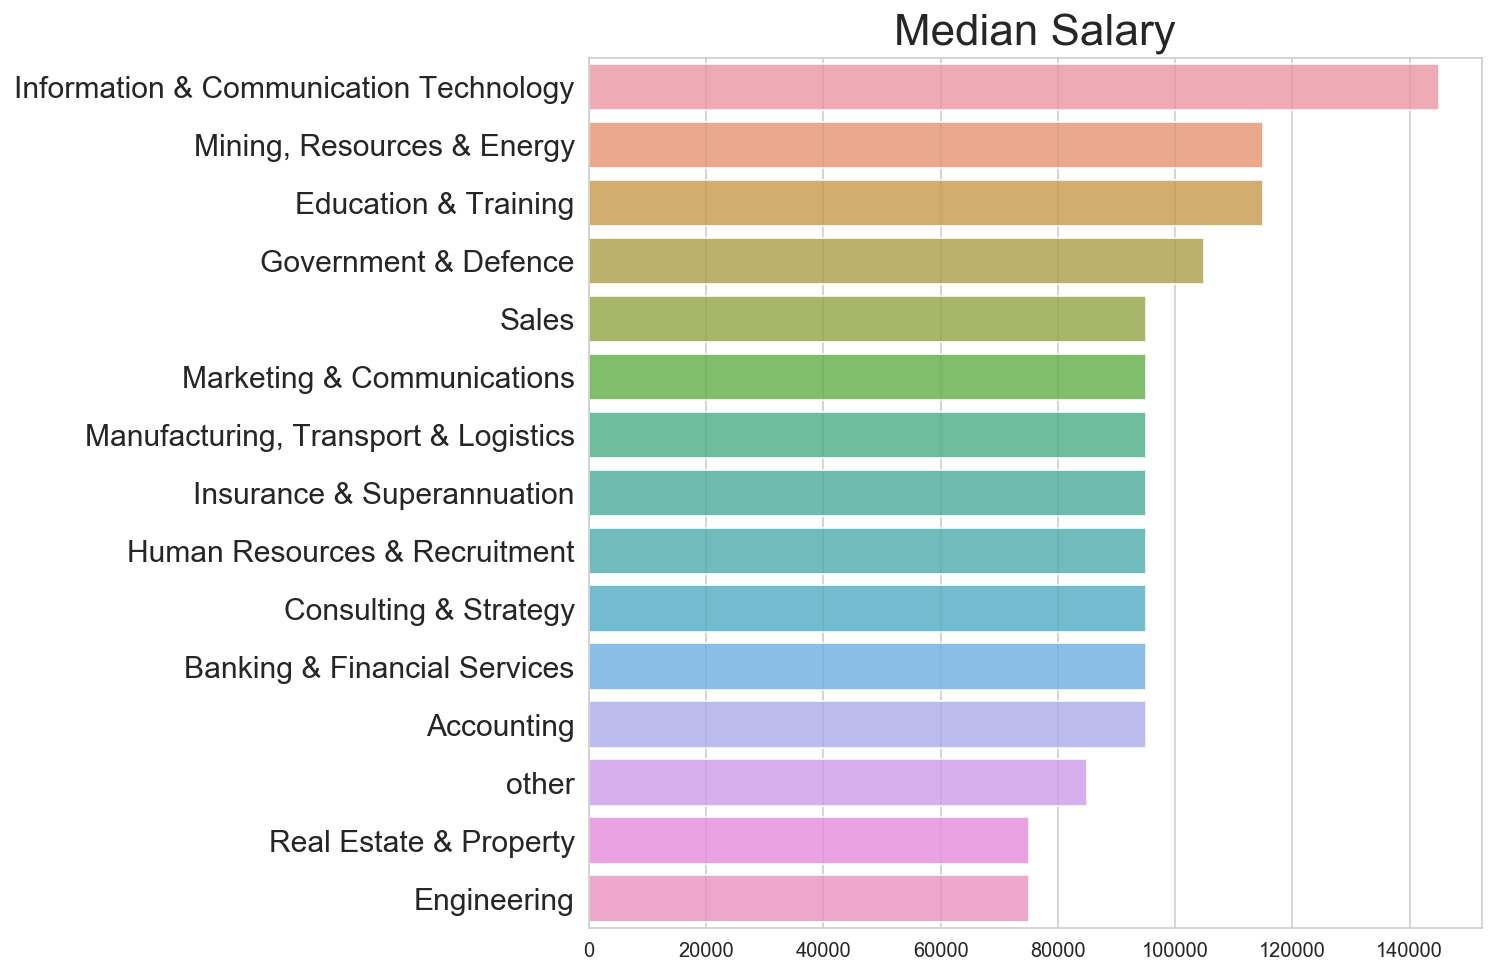

In [66]:
class_median_salary = df.groupby('class_rollup')['Salary_Range'].median().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
sns.barplot(y=class_median_salary.index, x=class_median_salary.values, alpha=0.8)
plt.title("Median Salary", fontsize=22)
plt.ylabel('', fontsize=20)
plt.xlabel('', fontsize=20)
plt.yticks(fontsize=15)
plt.show()

## NLP of Job Description

**Preprocessing**

In [67]:
# setup NLTK
# import nltk
# nltk.download('punkt') # for word tokenization
# nltk.download('stopwords')
# nltk.download('wordnet') # for word lemmatization

In [68]:
from nltk.tokenize import RegexpTokenizer

In [69]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re

#tokenize words
df['tokens'] = df.Job_Description.apply(lambda x: [w for w in word_tokenize(x.lower()) if w.isalpha()])

#remove words over 9 characters long
df['s_tokens'] = df.tokens.apply(lambda x: [word for word in x if len(word) <= 7])

# Remove stop words
df['noStops'] = df.s_tokens.apply(lambda x: [w for w in x if w not in stopwords.words('english')])

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize
df['lemmatized'] = df.noStops.apply(lambda x: [wordnet_lemmatizer.lemmatize(w) for w in x])

# Put it all together in a single string
df['lemmatizedStr'] = df.lemmatized.apply(lambda x: ' '.join(x))

In [70]:
df[['tokens', 's_tokens', 'noStops', 'lemmatized','lemmatizedStr']].sample(5)

,tokens,s_tokens,noStops,lemmatized,lemmatizedStr
107,"[our, client, is, a, boutique, investment, man...","[our, client, is, a, manager, and, due, to, gr...","[client, manager, due, growth, looking, analys...","[client, manager, due, growth, looking, analys...",client manager due growth looking analyst join...
762,"[months, temporary, contract, immediate, start...","[months, start, health, sector, very, hourly, ...","[months, start, health, sector, hourly, rate, ...","[month, start, health, sector, hourly, rate, c...",month start health sector hourly rate client c...
20,"[a, new, role, has, been, created, with, a, le...","[a, new, role, has, been, created, with, a, le...","[new, role, created, leading, banking, support...","[new, role, created, leading, banking, support...",new role created leading banking support makin...
123,"[are, you, a, creative, person, love, brainsto...","[are, you, a, person, love, and, out, of, the,...","[person, love, box, take, follow, actions, tea...","[person, love, box, take, follow, action, team...",person love box take follow action team player...
380,"[senior, business, analyst, data, controls, wo...","[senior, analyst, data, work, on, a, large, da...","[senior, analyst, data, work, large, data, pro...","[senior, analyst, data, work, large, data, pro...",senior analyst data work large data program ma...


- I will use a Classifier Model to determine whether the Salary is above or below the median value

In [71]:
salary_threshold = []
for salary in df.Salary_Range:
    if salary < 115000:
        salary_threshold.append('lower_threshold')
    else:
        salary_threshold.append('upper_threshold')
    
df['salary_threshold'] = salary_threshold   

In [72]:
word_data = df[['salary_threshold','lemmatizedStr','Classification','Location']]

In [73]:
salary_threshold_map = {
                        'lower_threshold' : 0,
                        'upper_threshold' : 1}

word_data['salary_threshold'] = word_data.salary_threshold.map(salary_threshold_map)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [74]:
word_data.head()

,salary_threshold,lemmatizedStr,Classification,Location
1,0,rolethe system data lead level data across inc...,Information & Communication Technology,Melbourne
2,0,seeking data analyst join team based sydney ns...,Accounting,Sydney
5,0,client leader sector seeking expand team cater...,Information & Communication Technology,Melbourne
6,0,one premium client based looking highly master...,Information & Communication Technology,ACT
8,0,role work leading process report pi data team ...,Information & Communication Technology,Perth


In [75]:
word_data.tail()

,salary_threshold,lemmatizedStr,Classification,Location
972,1,group looking senior analyst initial month hig...,Information & Communication Technology,ACT
975,1,client seeking senior strong banking fast pace...,Banking & Financial Services,Sydney
977,1,iconic barossa valley start x client well know...,Information & Communication Technology,Adelaide
978,1,role role within unit hence senior analyst goo...,Information & Communication Technology,Sydney
979,1,new month edrms analyst join state client edrm...,Information & Communication Technology,Brisbane


## Converting Words to Numerical Data

TfidfVectorizer and CountVectorizer both are methods for converting text data into vectors as model can process only numerical data. The efficiency of the methods vary case by case
- TFIDFVectorizer measures value which increases proportionally to count, but is offset by the frequency of the word in the corpus
- CountVectorizer counts the word frequencies

## Hashing and TF-IDF

In [76]:
stop_words = ('people', 'client', 'using', 'please', 'apply', 'science', 'data', 'year', 'need', 'process',
             'within', 'across', 'support', 'working', 'set', 'system', 'part', 'company', 'ensure', 'join',
             'looking', 'provide', 'include', 'level', 'tool', 'contact', 'key', 'change', 'deliver', 'new',
             'based', 'ability', 'use', 'user', 'market', 'project', 'group', 'product', 'service', 'range',
             'report', 'career', 'highly', 'develop', 'make', 'month', 'well', 'leading', 'offer', 'world',
             'end', 'one', 'build', 'big', 'help', 'best', 'source', 'also', 'value', 'assist', 'drive', 'like',
             'sydney', 'via', 'would', 'excel', 'must', 'click', 'plan', 'field', 'high', 'good', 'method', 'making', 'submit',
             'online', 'member', 'life')

In [77]:
from sklearn.model_selection import train_test_split
X = word_data.lemmatizedStr
y = word_data.salary_threshold
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.7, stop_words=stop_words)
tfidf_train_fit = tfidf_vectorizer.fit(X_train)
tfidf_train = tfidf_vectorizer.transform(X_train)

tfidf_test = tfidf_vectorizer.transform(X_test)
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

['aa', 'aaliyah', 'aami', 'aaron', 'ab', 'aba', 'abbott', 'abc', 'abf', 'abhinav']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [79]:
tfidf_X = tfidf_vectorizer.transform(X)

**TF-IDF with Logistic Regression**

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.03, class_weight='balanced', solver='newton-cg', random_state=42)
lr.fit(tfidf_train, y_train)
y_predicted_counts = lr.predict(tfidf_test)

In [81]:
from sklearn.metrics import classification_report, roc_auc_score
print("=== Classification Report ===")
print(classification_report(y_test, y_predicted_counts))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.69      0.79      0.73       284
           1       0.80      0.71      0.75       349

    accuracy                           0.74       633
   macro avg       0.75      0.75      0.74       633
weighted avg       0.75      0.74      0.74       633



In [82]:
from sklearn.metrics import roc_auc_score
roc_test_tfidf_lr = roc_auc_score(y_test, y_predicted_counts)
print(roc_auc_score(y_test, y_predicted_counts))

0.7479064934016707


In [83]:
from sklearn.model_selection import cross_val_score
cv_results_tfidf_lr = cross_val_score(lr, tfidf_X, y,
                             cv = 10, #10 folds
                             scoring = "roc_auc",
                             verbose = 2
                            )
print('Cross Validation 10 fold ROC_AUC mean is',cv_results_tfidf_lr.mean())

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
Cross Validation 10 fold ROC_AUC mean is 0.7480490587900961


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


**TF-IDF with Multinomial Naive Bayes Model**

In [84]:
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
nb_classifier = MultinomialNB()

nb_classifier.fit(tfidf_train, y_train)
test_predictions_nb_2 = nb_classifier.predict(tfidf_test)

cm = metrics.confusion_matrix(y_test, test_predictions_nb_2)
print(cm)

[[134 150]
 [ 26 323]]


In [85]:
from sklearn.metrics import classification_report, roc_auc_score
print("=== Classification Report ===")
print(classification_report(y_test, test_predictions_nb_2))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.47      0.60       284
           1       0.68      0.93      0.79       349

    accuracy                           0.72       633
   macro avg       0.76      0.70      0.69       633
weighted avg       0.75      0.72      0.70       633



In [86]:
from sklearn.metrics import roc_auc_score
roc_test_tfidf_nb = roc_auc_score(y_test, test_predictions_nb_2)
print(roc_auc_score(y_test, test_predictions_nb_2))

0.6986662092901248


In [87]:
from sklearn.model_selection import cross_val_score
cv_results_tfidf_nb = cross_val_score(nb_classifier, tfidf_X, y,
                             cv = 10, #10 folds
                             scoring = "roc_auc",
                             verbose = 2
                            )
print('Cross Validation 10 fold ROC_AUC mean is',cv_results_tfidf_nb.mean())

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


**TF-IDF and Random Forest Classifier**

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(tfidf_train, y_train)
test_pred_rfc = rfc.predict(tfidf_test)

cm = metrics.confusion_matrix(y_test, test_pred_rfc)
print(cm)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[201  83]
 [104 245]]


In [89]:
print("=== Classification Report ===")
print(classification_report(y_test, test_pred_rfc))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       284
           1       0.75      0.70      0.72       349

    accuracy                           0.70       633
   macro avg       0.70      0.70      0.70       633
weighted avg       0.71      0.70      0.71       633



In [90]:
from sklearn.metrics import roc_auc_score
roc_test_tfidf_rfc = roc_auc_score(y_test, test_pred_rfc)
print(roc_auc_score(y_test, test_pred_rfc))

0.7048761047661327


In [91]:
from sklearn.model_selection import cross_val_score
cv_results_tfidf_rfc = cross_val_score(rfc, tfidf_X, y,
                             cv = 10, #10 folds
                             scoring = "roc_auc",
                             verbose = 2
                            )
print('Cross Validation 10 fold ROC_AUC mean is',cv_results_tfidf_rfc.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


## CountVectorizer

In [92]:
list_corpus = word_data.lemmatizedStr
y = word_data.salary_threshold

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(list_corpus, y, stratify=y, random_state=42)

In [94]:
# Bag of words or "one hot encode" all unique words
from sklearn.feature_extraction.text import CountVectorizer
# transform training data
count_vectorizer = CountVectorizer(max_df=0.7, stop_words=stop_words)
X_train_counts_fit = count_vectorizer.fit(X_train)
X_train_counts = count_vectorizer.transform(X_train)

X_test_counts = count_vectorizer.transform(X_test)

In [95]:
X_counts = count_vectorizer.transform(X) #for cross val

In [96]:
X_train_counts.shape #we can see how this has changed the dimensionality

(1898, 5759)

**CountVectorizer and Logistic Regression Model**

In [97]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.03, class_weight='balanced', solver='newton-cg', random_state=42)
lr.fit(X_train_counts, y_train)
y_predicted_counts = lr.predict(X_test_counts)

In [98]:
test_predictions_lr = lr.predict(X_test_counts)

In [99]:
from sklearn.metrics import classification_report, roc_auc_score
print("=== Classification Report ===")
print(classification_report(y_test, test_predictions_lr))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       284
           1       0.77      0.75      0.76       349

    accuracy                           0.74       633
   macro avg       0.74      0.74      0.74       633
weighted avg       0.74      0.74      0.74       633



In [100]:
from sklearn.metrics import roc_auc_score
roc_test_count_lr = roc_auc_score(y_test, test_predictions_lr)
print(roc_auc_score(y_test, test_predictions_lr))

0.7394668872835869


In [101]:
from sklearn.model_selection import cross_val_score
cv_results_count_lr = cross_val_score(lr, X_counts, y,
                             cv = 10, #10 folds
                             scoring = "roc_auc",
                             verbose = 2
                            )
print('Cross Validation 10 fold ROC_AUC mean is',cv_results_count_lr.mean())

[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished


**CountVectorizer and Naive Bayes Model**

In [102]:
#Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train_counts, y_train)
test_predictions_nb = nb_classifier.predict(X_test_counts)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, test_predictions_nb)
print(cm)

[[201  83]
 [ 76 273]]


In [103]:
print("=== Classification Report ===")
print(classification_report(y_test, test_predictions_nb))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       284
           1       0.77      0.78      0.77       349

    accuracy                           0.75       633
   macro avg       0.75      0.74      0.75       633
weighted avg       0.75      0.75      0.75       633



In [104]:
from sklearn.metrics import roc_auc_score
roc_test_count_nb = roc_auc_score(y_test, test_predictions_nb)
print(roc_auc_score(y_test, test_predictions_nb))

0.7449907179466484


In [105]:
from sklearn.model_selection import cross_val_score
cv_results_count_nb = cross_val_score(nb_classifier, X_counts, y,
                             cv = 10, #10 folds
                             scoring = "roc_auc",
                             verbose = 2
                            )
print('Cross Validation 10 fold ROC_AUC mean is',cv_results_count_nb.mean())

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


**CountVectorizer and Random Forest Classifier**

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train_counts, y_train)
test_pred_rfc = rfc.predict(X_test_counts)

cm = metrics.confusion_matrix(y_test, test_pred_rfc)
print(cm)

[[204  80]
 [114 235]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [107]:
print("=== Classification Report ===")
print(classification_report(y_test, test_pred_rfc))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       284
           1       0.75      0.67      0.71       349

    accuracy                           0.69       633
   macro avg       0.69      0.70      0.69       633
weighted avg       0.70      0.69      0.69       633



In [108]:
from sklearn.metrics import roc_auc_score
roc_test_count_rfc = (roc_auc_score(y_test, test_pred_rfc))
print(roc_auc_score(y_test, test_pred_rfc))

0.6958311473425077


In [109]:
from sklearn.model_selection import cross_val_score
cv_results_count_rfc = cross_val_score(rfc, X_counts, y,
                             cv = 10, #10 folds
                             scoring = "roc_auc",
                             verbose = 2
                            )
print('Cross Validation 10 fold ROC_AUC mean is',cv_results_count_rfc.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


## NLP and Model ROC AUC Score Comparison

In [110]:
comparison = pd.DataFrame()
comparison['NLP Method'] = ['TF-IDF', 'TF-IDF', 'TF-IDF', 'CountVectorizer', 'CountVectorizer', 'CountVectorizer']
comparison['Model'] = ['LogisticRegression', 'Naive Bayes', 'RandomForestClassifier',
                       'LogisticRegression', 'Naive Bayes', 'RandomForestClassifier']
comparison['Test Data ROC AUC'] = [round(roc_test_tfidf_lr,2), round(roc_test_tfidf_nb,2), round(roc_test_tfidf_rfc,2), 
                                   round(roc_test_count_lr,2), round(roc_test_count_nb,2), round(roc_test_count_rfc,2)]
comparison['Cross Validation ROC AUC mean on all data'] = [round(cv_results_tfidf_lr.mean(),2), round(cv_results_tfidf_nb.mean(),2),
                                                           round(cv_results_tfidf_rfc.mean(),2), round(cv_results_count_lr.mean(),2), 
                                                           round(cv_results_count_nb.mean(),2), round(cv_results_count_rfc.mean(),2)]

comparison

,NLP Method,Model,Test Data ROC AUC,Cross Validation ROC AUC mean on all data
0,TF-IDF,LogisticRegression,0.75,0.75
1,TF-IDF,Naive Bayes,0.70,0.76
2,TF-IDF,RandomForestClassifier,0.70,0.71
3,CountVectorizer,LogisticRegression,0.74,0.75
4,CountVectorizer,Naive Bayes,0.74,0.74
5,CountVectorizer,RandomForestClassifier,0.70,0.69


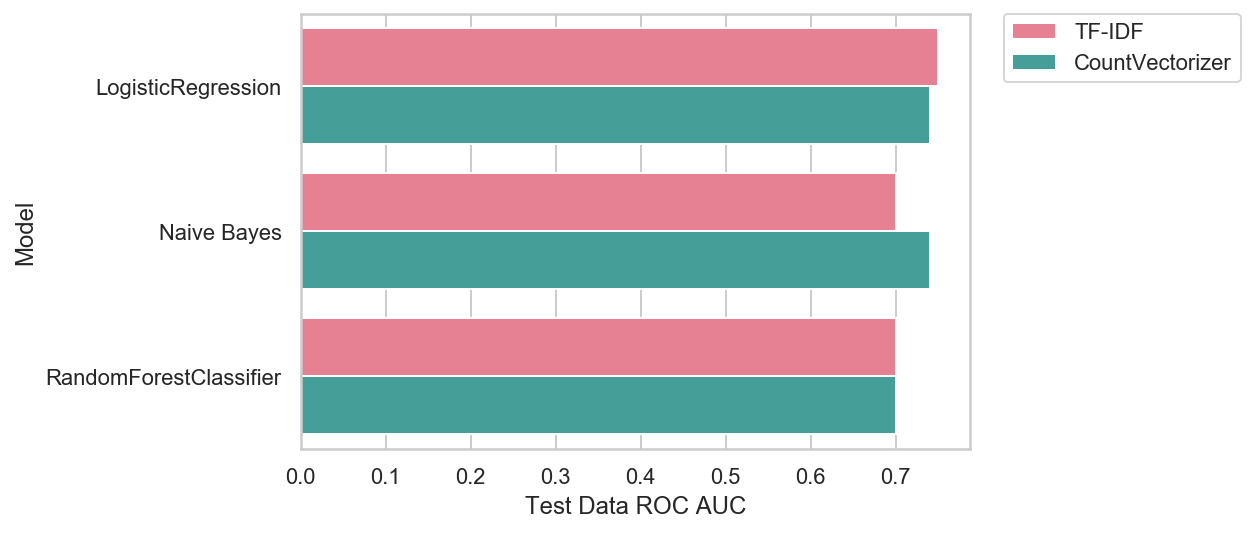

In [111]:
sns.set(style='whitegrid')
sns.barplot(x='Test Data ROC AUC', y='Model', data=comparison, hue='NLP Method', orient='h', 
           palette='husl')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

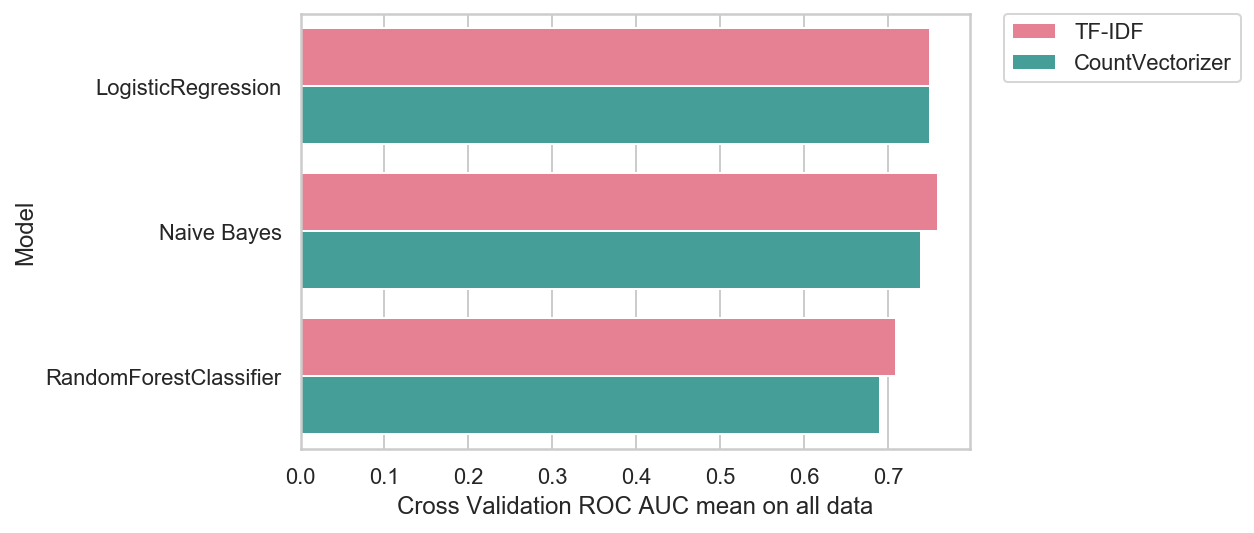

In [112]:
sns.set(style='whitegrid')
sns.barplot(x='Cross Validation ROC AUC mean on all data', y='Model', data=comparison, hue='NLP Method', orient='h', 
           palette='husl')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Importance of Cross Validation** : 
- It gives assurance that the model has got most of the patterns from the data correct, and its not picking up too much on the noise
- This is more robust than just checking the test data set
- As it performs a train test split multiple times (10 times in this case)

**Overall the NLP method that for best model performance was overall was CountVectorizer combined with the Multinomial Naive Bayes Model**

## Important features for the Best Performing Model

In [113]:
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = count_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

In [114]:
pd.DataFrame(feat_with_weights, columns=['score', 'feature_names']).tail(20)

,score,feature_names
5739,-5.576960,global
5740,-5.569023,program
5741,-5.565078,analyse
5742,-5.526464,testing
5743,-5.500294,proven
5744,-5.471201,culture
5745,-5.442930,finance
5746,-5.439452,manage
5747,-5.425659,diverse
5748,-5.415437,digital


- These words were most strongly associated with a higher Salary role

**Generate a word cloud based on features that are related to a Higher Salary**

In [115]:
from wordcloud import WordCloud
import os

from os import path

In [116]:
feats = pd.DataFrame(feat_with_weights, columns=['score', 'feature_names']).tail(20)

In [117]:
text = " ".join(review for review in feats.feature_names)

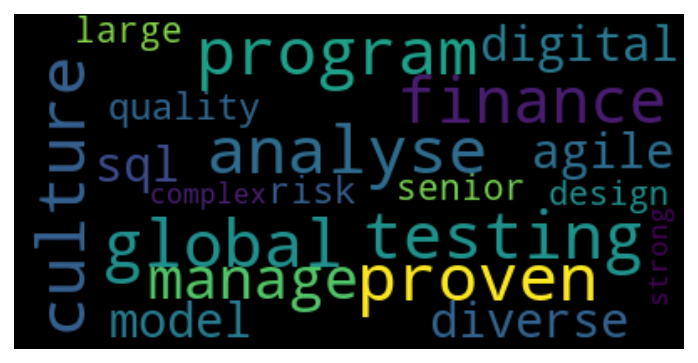

In [118]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Factors that distinguish a Data Scientist vs a Data Analyst

In [119]:
df[['Clean_Job_Title', 'lemmatizedStr']]

,Clean_Job_Title,lemmatizedStr
1,Data Analyst,rolethe system data lead level data across inc...
2,Data Analyst,seeking data analyst join team based sydney ns...
5,Data Analyst,client leader sector seeking expand team cater...
6,Data Analyst,one premium client based looking highly master...
8,Data Analyst,role work leading process report pi data team ...
...,...,...
972,Data Analyst,group looking senior analyst initial month hig...
975,Data Analyst,client seeking senior strong banking fast pace...
977,Data Analyst,iconic barossa valley start x client well know...
978,Data Analyst,role role within unit hence senior analyst goo...


In [120]:
data_job = []
for Clean_Job_Title in df.Clean_Job_Title:
    if Clean_Job_Title == 'Data Scientist':
        data_job.append(1)
    else:
        data_job.append(0)
    
df['data_job'] = data_job  

In [121]:
df[['Clean_Job_Title', 'data_job','lemmatizedStr']]

,Clean_Job_Title,data_job,lemmatizedStr
1,Data Analyst,0,rolethe system data lead level data across inc...
2,Data Analyst,0,seeking data analyst join team based sydney ns...
5,Data Analyst,0,client leader sector seeking expand team cater...
6,Data Analyst,0,one premium client based looking highly master...
8,Data Analyst,0,role work leading process report pi data team ...
...,...,...,...
972,Data Analyst,0,group looking senior analyst initial month hig...
975,Data Analyst,0,client seeking senior strong banking fast pace...
977,Data Analyst,0,iconic barossa valley start x client well know...
978,Data Analyst,0,role role within unit hence senior analyst goo...


In [122]:
df.data_job.value_counts()

0    2401
1     130
Name: data_job, dtype: int64

- There is a low value count of Data Scientist, classified as [1]
- Therefore, it is important to stratify y in the train test split
- This is to ensure that there is a proportional amount of [1] value in both the train and test sets

In [123]:
from sklearn.model_selection import train_test_split
X = df.lemmatizedStr
y = df.data_job
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [124]:
X_train.shape

(1898,)

In [125]:
# Bag of words or "one hot encode" all unique words
from sklearn.feature_extraction.text import CountVectorizer
# transform training data
count_vectorizer = CountVectorizer(max_df=0.7, stop_words=stop_words)
X_train_counts_fit = count_vectorizer.fit(X_train)
X_train_counts = count_vectorizer.transform(X_train)

X_test_counts = count_vectorizer.transform(X_test)

In [126]:
X_train_counts.shape

(1898, 5792)

In [127]:
X_counts = count_vectorizer.transform(X) #for cross val

In [128]:
#Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train_counts, y_train)
test_predictions_nb = nb_classifier.predict(X_test_counts)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, test_predictions_nb)
print(cm)

[[599   1]
 [ 22  11]]


In [129]:
print("=== Classification Report ===")
print(classification_report(y_test, test_predictions_nb))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       600
           1       0.92      0.33      0.49        33

    accuracy                           0.96       633
   macro avg       0.94      0.67      0.74       633
weighted avg       0.96      0.96      0.96       633



In [130]:
from sklearn.metrics import roc_auc_score
roc_test_count_nb = roc_auc_score(y_test, test_predictions_nb)
print(roc_auc_score(y_test, test_predictions_nb))

0.6658333333333333


In [131]:
from sklearn.model_selection import cross_val_score
cv_results_count_nb = cross_val_score(nb_classifier, X_counts, y,
                             cv = 10, #10 folds
                             scoring = "roc_auc",
                             verbose = 2
                            )
print('Cross Validation 10 fold ROC_AUC mean is',cv_results_count_nb.mean())

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [132]:
feature_names = count_vectorizer.get_feature_names()
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

In [133]:
pd.DataFrame(feat_with_weights, columns=['score', 'feature_names']).tail(20)


,score,feature_names
5772,-6.177099,focus
5773,-6.140731,degree
5774,-6.140731,variety
5775,-6.105640,culture
5776,-6.007199,global
5777,-5.784056,manage
5778,-5.711735,senior
5779,-5.666273,design
5780,-5.666273,lead
5781,-5.644294,sql


In [134]:
feats = pd.DataFrame(feat_with_weights, columns=['score', 'feature_names']).tail(20)

In [135]:
text = " ".join(review for review in feats.feature_names)

**Generate a Word Cloud for the features which are related to Data Scientist**

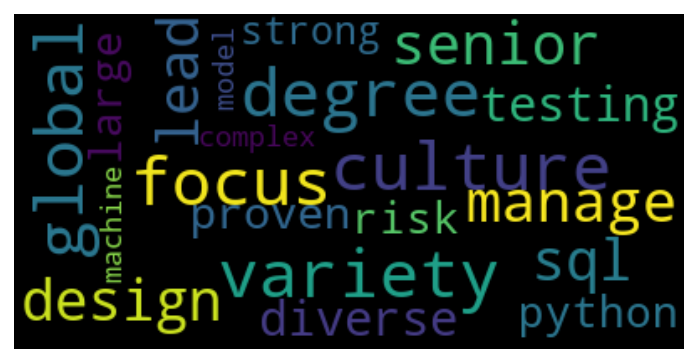

In [136]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
